In [1]:
import os
from mu2e import mu2e_ext_path
from mu2e.dataframeprod import DataFrameMaker
from mu2e.mu2eplots import mu2e_plot, mu2e_plot3d
from matplotlib import gridspec
%matplotlib inline
plt.rcParams['figure.figsize'] = (12,8)
import pandas as pd
from time import sleep
import plotly.io as pio
from plotly.offline import init_notebook_mode
from skhep.visual import MplPlotter as splt
from copy import deepcopy
from lmfit import Model, Parameters, report_fit
from hallprobesim_redux import *
from tqdm import tnrange, tqdm_notebook
import pandas as pd
import seaborn as sns

<IPython.core.display.Javascript object>

# Combo Fit 

In [7]:
cfg_pickle_Opt = cfg_pickle(use_pickle=False, save_pickle=True,
                             load_name='solA_fit_val', save_name='solC_val', recreate=False)
cfg_params_Opt  = cfg_params(pitch1=0.1, ms_h1=2, ns_h1=3,
                                 pitch2=0, ms_h2=0, ns_h2=0,
                                 length1=9.2, ms_c1=5, ns_c1=3,
                                 length2=0, ms_c2=0, ns_c2=0,
                                 ks_dict={'k3':768},
                                 bs_tuples=((0.25, 0, -4.6),
                                            (0.25, 0, 4.6)),
                                 bs_bounds=(1e-3, 1e-3, 4),
                                 version=1000)
hmd, ff = field_map_analysis('fma_opt_test', cfg_data_Cole_250mm_short_cyl,
                                  cfg_geom_Cole_250mm_cyl, cfg_params_Opt,
                                  cfg_pickle_Opt, cfg_plot_none)

fitting with func_version=1000,
cfg_params(pitch1=0.1, ms_h1=2, ns_h1=3, pitch2=0, ms_h2=0, ns_h2=0, length1=9.2, ms_c1=5, ns_c1=3, length2=0, ms_c2=0, ns_c2=0, ks_dict={'k3': 768}, bs_tuples=((0.25, 0, -4.6), (0.25, 0, 4.6)), bs_bounds=(0.001, 0.001, 4), version=1000)
Elapsed time was 26.2377 seconds
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 1249
    # data points      = 17280
    # variables        = 58
    chi-square         = 0.00001
    reduced chi-square = 0.00000
    Akaike info crit   = -371016.76606
    Bayesian info crit = -370566.84237
[[Variables]]
    pitch1:    0.1 (fixed)
    ms_h1:     2 (fixed)
    ns_h1:     3 (fixed)
    pitch2:    0 (fixed)
    ms_h2:     0 (fixed)
    ns_h2:     0 (fixed)
    length1:   9.2 (fixed)
    ms_c1:     5 (fixed)
    ns_c1:     3 (fixed)
    length2:   0 (fixed)
    ms_c2:     0 (fixed)
    ns_c2:     0 (fixed)
    Ah1_0_0:   0 (fixed)
    Bh1_0_0:   0 (fixed)
    Ch1_0_0:  -5.5836e-12 +/- 0        (0.00

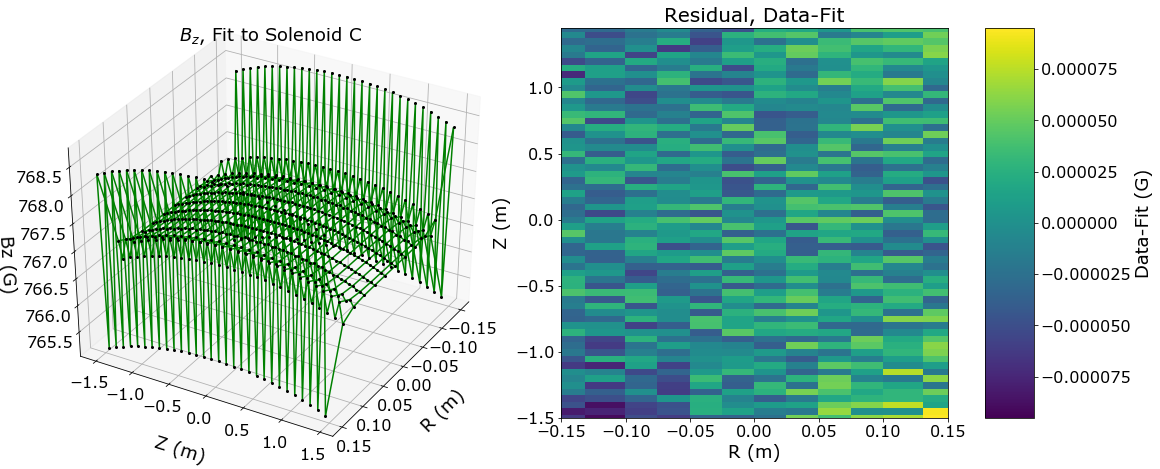

In [13]:
phi=0
fig = mu2e_plot3d(ff.input_data, 'R', 'Z', 'Bz', f'R<=0.15 and Phi=={phi} and -2<Z<2',
            title_simp = r'$B_{z}$, Fit to Solenoid C', df_fit=True, mode='mpl', ptype='3d', units='m', aspect='rect2', do2pi=True)
plt.savefig('/Users/brianpollack/Documents/Notes_Papers/Helix/figs/bz_C_fit.png', bbox_inches='tight')

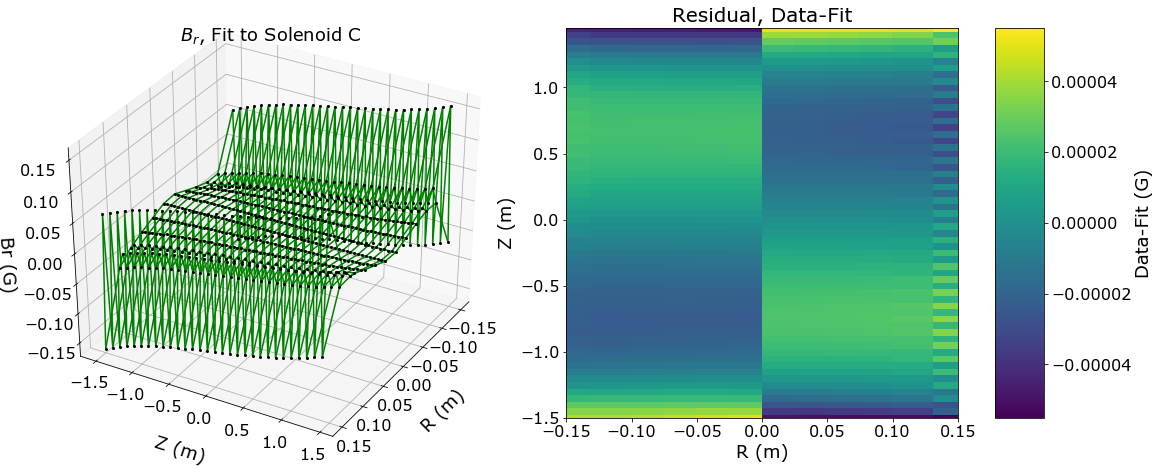

In [14]:
phi=0
fig = mu2e_plot3d(ff.input_data, 'R', 'Z', 'Br', f'R<=0.15 and Phi=={phi} and -2<Z<2',
            title_simp = r'$B_{r}$, Fit to Solenoid C', df_fit=True, mode='mpl', ptype='3d', units='m', aspect='rect2', do2pi=True)
plt.savefig('/Users/brianpollack/Documents/Notes_Papers/Helix/figs/br_C_fit.png', bbox_inches='tight')

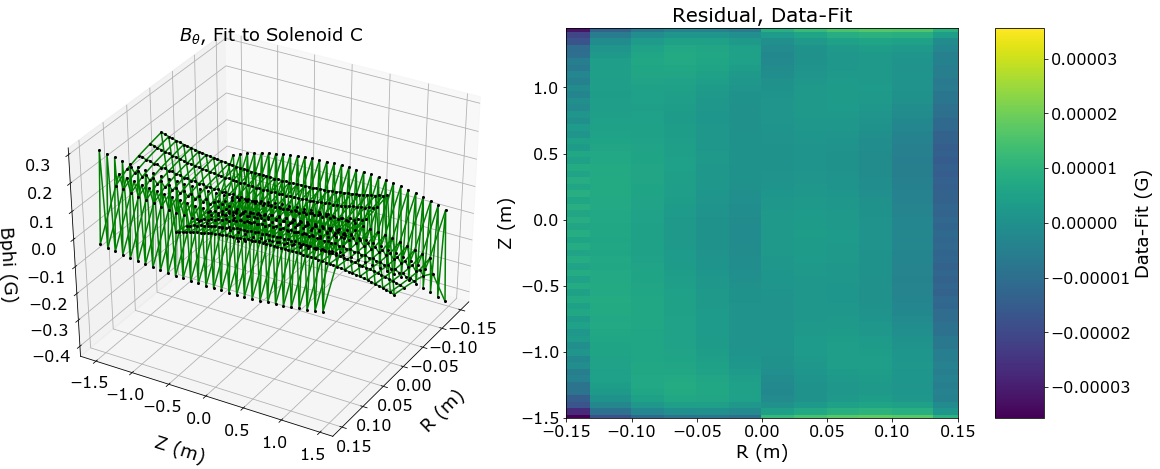

In [15]:
phi=0
fig = mu2e_plot3d(ff.input_data, 'R', 'Z', 'Bphi', f'R<=0.15 and Phi=={phi} and -2<Z<2',
            title_simp = r'$B_{\theta}$, Fit to Solenoid C', df_fit=True, mode='mpl', ptype='3d', units='m', aspect='rect2', do2pi=True)
plt.savefig('/Users/brianpollack/Documents/Notes_Papers/Helix/figs/bt_C_fit.png', bbox_inches='tight')

# Validation

In [11]:
cfg_pickle_fs = cfg_pickle(use_pickle=False, save_pickle=True,
                             load_name='solC_val', save_name='solC_val', recreate=True)
_, ff_fullsim = field_map_analysis('fma_fit_solC', cfg_data_Cole_250mm_short_cyl,
                                  cfg_geom_Cole_250mm_cyl_hg, cfg_params_Opt,
                                  cfg_pickle_fs, cfg_plot_none)
df_fs =ff_fullsim.input_data

recreating fit with func_version=1000,
cfg_params(pitch1=0.1, ms_h1=2, ns_h1=3, pitch2=0, ms_h2=0, ns_h2=0, length1=9.2, ms_c1=5, ns_c1=3, length2=0, ms_c2=0, ns_c2=0, ks_dict={'k3': 768}, bs_tuples=((0.25, 0, -4.6), (0.25, 0, 4.6)), bs_bounds=(0.001, 0.001, 4), version=1000)
Elapsed time was 8.41569 seconds
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 2
    # data points      = 1088640
    # variables        = 0
    chi-square         = 0.00060
    reduced chi-square = 0.00000
    Akaike info crit   = -23215762.33757
    Bayesian info crit = -23215762.33757
[[Variables]]
    pitch1:    0.1 (fixed)
    ms_h1:     2 (fixed)
    ns_h1:     3 (fixed)
    pitch2:    0 (fixed)
    ms_h2:     0 (fixed)
    ns_h2:     0 (fixed)
    length1:   9.2 (fixed)
    ms_c1:     5 (fixed)
    ns_c1:     3 (fixed)
    length2:   0 (fixed)
    ms_c2:     0 (fixed)
    ns_c2:     0 (fixed)
    Ah1_0_0:   0 (fixed)
    Bh1_0_0:   0 (fixed)
    Ch1_0_0:  -5.583648e-12 (fixed)

In [17]:
df_fs.eval('Bmag = (Bz**2+Br**2+Bphi**2)**(1/2)', inplace=True)
df_fs.eval('Bmag_fit = (Bz_fit**2+Br_fit**2+Bphi_fit**2)**(1/2)', inplace=True)

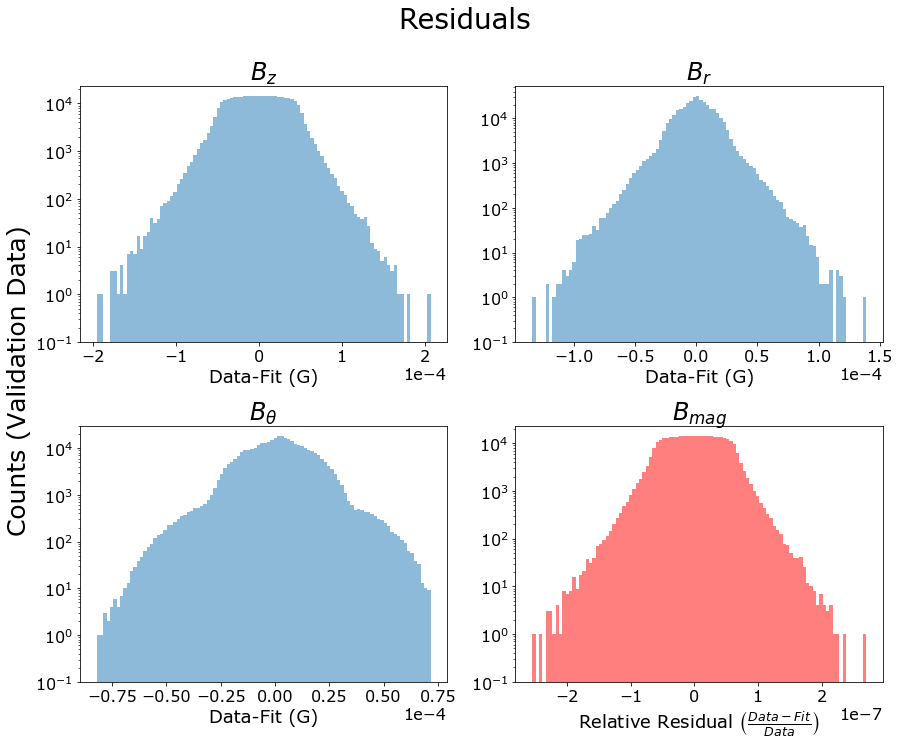

In [20]:
fig, axs = plt.subplots(2, 2, figsize=(12,10), constrained_layout=True)
#fig.text(0.5,0.01, "Data-Fit (G)", ha="center", va="center", fontsize=18)
#ax = fig.add_subplot(2, 2, 1)
_ = splt.hist((df_fs.Bz-df_fs.Bz_fit), ax=axs[0][0], bins=100, log=True)
axs[0][0].set_title(r'$B_z$', fontsize=24)
#axs[0][0].set_ylabel('Counts')
axs[0][0].set_xlabel('Data-Fit (G)')
axs[0][0].ticklabel_format(style='sci', axis='x', scilimits=(0,0), useOffset=False)
_ = splt.hist((df_fs.Br-df_fs.Br_fit), ax=axs[0][1], bins=100, log=True)
axs[0][1].set_title(r'$B_r$', fontsize=24)
axs[0][1].set_xlabel('Data-Fit (G)')
axs[0][1].ticklabel_format(style='sci', axis='x', scilimits=(0,0), useOffset=False)
_ = splt.hist((df_fs.Bphi-df_fs.Bphi_fit), ax=axs[1][0], bins=100, log=True)
axs[1][0].set_title(r'$B_{\theta}$', fontsize=24)
axs[1][0].set_xlabel('Data-Fit (G)')
axs[1][0].ticklabel_format(style='sci', axis='x', scilimits=(0,0), useOffset=False)
_ = splt.hist((df_fs.Bmag-df_fs.Bmag_fit)/df_fs.Bmag, ax=axs[1][1], bins=100, log=True, color='r')
axs[1][1].set_title(r'$B_{mag}$', fontsize=24)
axs[1][1].set_xlabel(r'Relative Residual $\left(\frac{Data-Fit}{Data}\right)$')
axs[1][1].ticklabel_format(style='sci', axis='x', scilimits=(0,0), useOffset=False)
fig.suptitle('Residuals', verticalalignment='bottom', fontsize=28)
fig.text(-0.015,0.5, "Counts (Validation Data)", ha="center", va="center", rotation=90, fontsize=25)
plt.savefig('/Users/brianpollack/Documents/Notes_Papers/Helix/figs/res_solC.pdf', bbox_inches='tight')
#plt.savefig('/Users/brianpollack/Documents/Notes_Papers/Helix/figs/res_solA_cyl.pdf', bbox_inches='tight')

# fig = plt.figure(figsize=plt.figaspect(0.3), constrained_layout=False)
# fig.text(0.5,0.01, "Data-Fit (G)", ha="center", va="center", fontsize=18)
# ax = fig.add_subplot(1, 3, 1)
# ax.ticklabel_format(style='sci', axis='x', scilimits=(0,0), useOffset=False)
# _ = splt.hist((df_fs.Bz-df_fs.Bz_fit), ax=ax, bins=100, log=True, color='r')
# ax.set_title(r'$B_{z}$')
# ax.set_ylabel('Counts')
# ax = fig.add_subplot(1, 3, 2)
# ax.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
# _ = splt.hist((df_fs.Br-df_fs.Br_fit), ax=ax, bins=100, log=True, color='r')
# ax.set_title(r'$B_r$')
# ax = fig.add_subplot(1, 3, 3)
# ax.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
# _ = splt.hist((df_fs.Bphi-df_fs.Bphi_fit), ax=ax, bins=100, log=True, color='r')
# ax.set_title(r'$B_{\theta}$')
# fig.suptitle('B Component Residuals', verticalalignment='bottom')
# plt.savefig('/Users/brianpollack/Documents/Notes_Papers/Helix/figs/res_solC.pdf', bbox_inches='tight')